In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/_scripts")

from read.svg_reader import SVGReader
from adjacencies.adjacency import AdjacencyGenerator

from placement.executer import PlacementExecuter

from svg_helpers.saver import Saver, read_layout
from svg_helpers.plotter import Plotter
from svg_helpers.layout import Layout

from read.dimensions import DimensionsUpdater

from pint import UnitRegistry


from svg_helpers.shapely import create_box_from_corners, create_box_from_decimal_corners, bounds_to_decimal_corners
from decimal import Decimal, getcontext

from svg_helpers.domains import Corners, DecimalCorners

ImportError: cannot import name 'SVGReference' from partially initialized module 'reader.conversion' (most likely due to a circular import) (/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/_scripts/reader/conversion.py)

In [2]:
getcontext().prec = 8

In [3]:
ureg = UnitRegistry()

In [4]:
svg_name = "amber_building_a_f01.svg"
sv = SVGReader(svg_name)
sv.run()

In [8]:
import os

In [10]:
sv.rectangles

[SVGRect(x=0.0, y=0.0, width=269.0, height=234.0, id='bedroom_1'),
 SVGRect(x=281.0, y=322.0, width=150.0, height=187.0, id='kitchen'),
 SVGRect(x=443.0, y=0.0, width=194.0, height=109.0, id='m_bath'),
 SVGRect(x=652.0, y=0.0, width=178.0, height=229.0, id='m_bedroom'),
 SVGRect(x=746.0, y=234.0, width=84.0, height=50.0, id='m_closet'),
 SVGRect(x=443.0, y=126.0, width=194.0, height=103.0, id='bath'),
 SVGRect(x=453.0, y=246.0, width=281.0, height=263.0, id='dining'),
 SVGRect(x=281.0, y=159.0, width=150.0, height=149.0, id='transit_space'),
 SVGRect(x=746.0, y=312.0, width=84.0, height=201.0, id='closet'),
 SVGRect(x=0.0, y=246.0, width=269.0, height=263.0, id='bedroom_2'),
 SVGRect(x=282.0, y=3.0, width=134.0, height=146.0, id='laundry')]

In [12]:
[br] = [i for i in sv.rectangles if i.id == "bedroom_1"]
br

SVGRect(x=0.0, y=0.0, width=269.0, height=234.0, id='bedroom_1')

In [14]:
br.__getattribute__("width")

269.0

In [13]:
br.height

234.0

In [5]:
corners = sv.domains["bedroom_1"].corners
corners

Corners(x_left=0.0, x_right=269.0, y_bottom=275.0, y_top=509.0)

In [6]:
corners.to_decimal_corners()

DecimalCorners(x_left=Decimal('0'), x_right=Decimal('269'), y_bottom=Decimal('275'), y_top=Decimal('509'))

In [22]:
# fosv.domains

{'bedroom_1': Domain(polygon=<POLYGON ((0 275, 269 275, 269 509, 0 509, 0 275))>, corners=Corners(x_left=0.0, x_right=269.0, y_bottom=275.0, y_top=509.0), new_corners=Corners(x_left=0, x_right=0, y_bottom=0, y_top=0)),
 'kitchen': Domain(polygon=<POLYGON ((281 0, 431 0, 431 187, 281 187, 281 0))>, corners=Corners(x_left=281.0, x_right=431.0, y_bottom=0.0, y_top=187.0), new_corners=Corners(x_left=0, x_right=0, y_bottom=0, y_top=0)),
 'm_bath': Domain(polygon=<POLYGON ((443 400, 637 400, 637 509, 443 509, 443 400))>, corners=Corners(x_left=443.0, x_right=637.0, y_bottom=400.0, y_top=509.0), new_corners=Corners(x_left=0, x_right=0, y_bottom=0, y_top=0)),
 'm_bedroom': Domain(polygon=<POLYGON ((652 280, 830 280, 830 509, 652 509, 652 280))>, corners=Corners(x_left=652.0, x_right=830.0, y_bottom=280.0, y_top=509.0), new_corners=Corners(x_left=0, x_right=0, y_bottom=0, y_top=0)),
 'm_closet': Domain(polygon=<POLYGON ((746 225, 830 225, 830 275, 746 275, 746 225))>, corners=Corners(x_left=746

In [12]:
a1  = sv.domains["bedroom_1"].polygon.area
a1


62946.0

In [13]:
du = DimensionsUpdater(sv.domains["bedroom_1"].corners)
du.conversion


0.013758333333333332

In [15]:
dimmed = [round(Decimal(i*du.conversion),2) for i in corners]
dimmed

[Decimal('0.00'), Decimal('3.70'), Decimal('3.78'), Decimal('7.00')]

In [20]:
bd = create_box_from_decimal_corners((DecimalCorners(*dimmed)))
bd.area

11.914000000000001

In [21]:
bounds_to_decimal_corners(bd.bounds)

DecimalCorners(x_left=Decimal('0.00'), x_right=Decimal('3.70'), y_bottom=Decimal('3.78'), y_top=Decimal('7.00'))

In [9]:
(create_box_from_corners((Corners(*dimmed)))).area

11.91515762125

In [10]:
a1 * (du.conversion**2)

11.91515762125

In [11]:
tt = dimmed[1]
round(Decimal(tt), 2)

Decimal('3.70')

In [12]:
f = lambda x: round(Decimal(x), 2)
f(2.4567890)

Decimal('2.46')

In [13]:
rounded = [f(i*du.conversion) for i in corners]
rounded 

[Decimal('0.00'), Decimal('3.70'), Decimal('3.78'), Decimal('7.00')]

In [14]:
dc  = DecimalCorners(*rounded)
dc

DecimalCorners(x_left=Decimal('0.00'), x_right=Decimal('3.70'), y_bottom=Decimal('3.78'), y_top=Decimal('7.00'))

In [15]:
[i for i in dc.get_float_values()]

[0.0, 3.7, 3.78, 7.0]

In [31]:
float(dc.x_right)

3.7

In [14]:
float(rounded[1])

3.7

In [15]:
rounded[1].as_integer_ratio()

(37, 10)

In [16]:
cr = Corners(*[float(i) for i in rounded])
cr

Corners(x_left=0.0, x_right=3.7, y_bottom=3.78, y_top=7.0)

In [20]:
cr.y_top

7.0

In [17]:
cr.to_decimal()

In [19]:
type(cr.y_top)

float

In [74]:
cr.x_left = Decimal(cr.x_left)

In [73]:
cr.get_decimal_values()

<generator object Corners.get_decimal_values.<locals>.<genexpr> at 0x10f0933e0>

In [72]:
cc = Corners(*rounded)
cc

Corners(x_left=Decimal('0.00'), x_right=Decimal('3.70'), y_bottom=Decimal('3.78'), y_top=Decimal('7.00'))

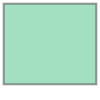

In [64]:
bb = create_box_from_corners(cr)
bb

In [69]:
bb.bounds

(0.0, 3.78, 3.7, 7.0)

In [66]:
Decimal(bb.bounds[1])

Decimal('3.779999999999999804600747665972448885440826416015625')

#### rest 

In [3]:
ag = AdjacencyGenerator(sv.domains)
ag.run()

In [4]:
lp = PlacementExecuter(ag.G, ag.domains)
lp.run()

---m_bedroom has no western nbs that are unplaced
dining, the east node of m_closet has not yet been placed.
changing north node reference to 1. Number of unplaced nodes is 3
no more nodes to place


In [5]:
pl = Plotter(lp.corners)
pl.plot()

In [7]:
layout = Layout(lp.shapes, lp.corners, lp.G)

In [8]:
sa = Saver(layout, "amber")
sa.save()